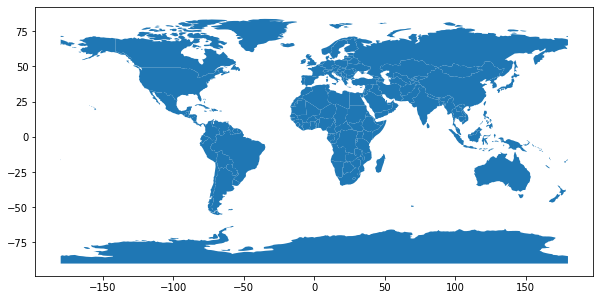

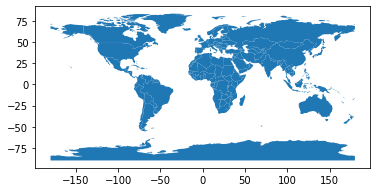

In [12]:
from folium.plugins import TimeSliderChoropleth
from branca.colormap import linear
import numpy as np
'feature.id'

import folium
import pandas as pd
import geopandas as gpd


assert 'naturalearth_lowres' in gpd.datasets.available
datapath = gpd.datasets.get_path('naturalearth_lowres')
gdf = gpd.read_file(datapath)

gdf.head()
ax = gdf.plot(figsize=(10, 10))


n_periods, n_sample = 48, 40

assert n_sample < n_periods

datetime_index = pd.date_range('2016-1-1', periods=n_periods, freq='M')
dt_index_epochs = datetime_index.astype(int) // 10**9
dt_index = dt_index_epochs.astype('U10')

dt_index
datetime_index


styledata = {}

for country in gdf.index:
    df = pd.DataFrame(
        {'color': np.random.normal(size=n_periods),
         'opacity': np.random.normal(size=n_periods)},
        index=dt_index
    )
    df = df.cumsum()
    df.sample(n_sample, replace=False).sort_index()
    styledata[country] = df

gdf.plot()


max_color, min_color, max_opacity, min_opacity = 0, 0, 0, 0

for country, data in styledata.items():
    max_color = max(max_color, data['color'].max())
    min_color = min(max_color, data['color'].min())
    max_opacity = max(max_color, data['opacity'].max())
    max_opacity = min(max_color, data['opacity'].max())


cmap = linear.PuRd_09.scale(min_color, max_color)


def norm(x):
    return (x - x.min()) / (x.max() - x.min())


for country, data in styledata.items():
    data['color'] = data['color'].apply(cmap)
    data['opacity'] = norm(data['opacity'])

styledict = {
    str(country): data.to_dict(orient='index') for
    country, data in styledata.items()
}


m = folium.Map([0, 0], tiles='Stamen Toner', zoom_start=2)

g = TimeSliderChoropleth(
    gdf.to_json(),
    styledict=styledict
).add_to(m)

In [16]:
gdf.to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"continent": "Oceania", "gdp_md_est": 8374.0, "iso_a3": "FJI", "name": "Fiji", "pop_est": 920938}, "geometry": {"type": "MultiPolygon", "coordinates": [[[[180.0, -16.067132663642447], [180.0, -16.555216566639196], [179.36414266196414, -16.801354076946883], [178.72505936299711, -17.01204167436804], [178.59683859511713, -16.639150000000004], [179.0966093629971, -16.433984277547403], [179.4135093629971, -16.379054277547404], [180.0, -16.067132663642447]]], [[[178.12557, -17.50481], [178.3736, -17.33992], [178.71806, -17.62846], [178.55271, -18.15059], [177.93266000000003, -18.28799], [177.38146, -18.16432], [177.28504, -17.72465], [177.67087, -17.381140000000002], [178.12557, -17.50481]]], [[[-179.79332010904864, -16.020882256741224], [-179.9173693847653, -16.501783135649397], [-180.0, -16.555216566639196], [-180.0, -16.067132663642447], [-179.79332010904864, -16.020882256741224]]]]}}, {"id": "1", "t

In [17]:
styledict

{'0': {'1454198400': {'color': '#e6deee', 'opacity': 0.5343966283920849},
  '1456704000': {'color': '#e8e3f0', 'opacity': 0.6159869386310309},
  '1459382400': {'color': '#e7e1ef', 'opacity': 0.8084711576116841},
  '1461974400': {'color': '#eae4f1', 'opacity': 0.7991880306588947},
  '1464652800': {'color': '#f3eff6', 'opacity': 0.7196950878216198},
  '1467244800': {'color': '#eeeaf4', 'opacity': 0.8032835095554891},
  '1469923200': {'color': '#ede8f3', 'opacity': 0.7407879262074946},
  '1472601600': {'color': '#f0ecf5', 'opacity': 0.636414810860738},
  '1475193600': {'color': '#eeeaf4', 'opacity': 0.43703925544204364},
  '1477872000': {'color': '#f7f4f9', 'opacity': 0.48779294079110985},
  '1480464000': {'color': '#f6f3f9', 'opacity': 0.3454525466563921},
  '1483142400': {'color': '#f3eff7', 'opacity': 0.4934962210322216},
  '1485820800': {'color': '#f6f3f9', 'opacity': 0.32458014390170326},
  '1488240000': {'color': '#efebf4', 'opacity': 0.20312836755383287},
  '1490918400': {'color': 

In [18]:
"0"=='0'

True